In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
%matplotlib inline

Text(0.5, 1.0, 'temporal kernal of gain')

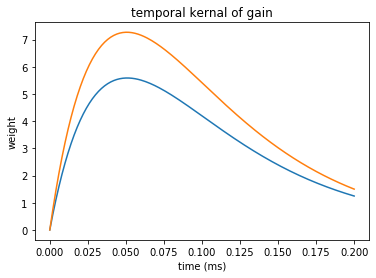

In [12]:
#Adaptation filter
tau_y = 0.0506
tau_z = 0.5769
gamma = 0.764
beta_c = -605
dt = 0.001
def Ky(t):
    return t*np.exp(-t/tau_y)/(tau_y**2)
def Kz(t):
    y = gamma*t*np.exp(-t/tau_y)/(tau_y**2)
    z = (1-gamma)*t*np.exp(-t/tau_z)/(tau_z**2)
    return y+z
length = 30
temp_Kz = Kz(np.arange(0,0.2+dt,dt))
plt.plot(np.arange(0,0.2+dt,dt),temp_Kz)
plt.plot(np.arange(0,0.2+dt,dt),Ky(np.arange(0,0.2+dt,dt)))
plt.xlabel('time (ms)')
plt.ylabel('weight')
plt.title('temporal kernal of gain')

Text(0.5, 1.0, 'temporal kernal of gain')

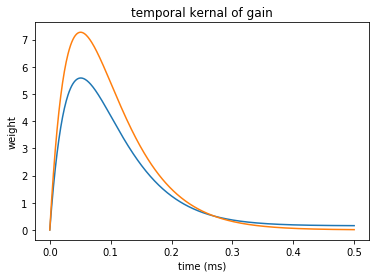

In [13]:
#Adaptation filter
tau_y = 0.0506
tau_z = 0.5769
gamma = 0.764
beta_c = -605
dt = 0.001
def Ky(t):
    return t*np.exp(-t/tau_y)/(tau_y**2)
def Kz(t):
    y = gamma*t*np.exp(-t/tau_y)/(tau_y**2)
    z = (1-gamma)*t*np.exp(-t/tau_z)/(tau_z**2)
    return y+z
length = 30
temp_Kz = Kz(np.arange(0,0.5+dt,dt))
plt.plot(np.arange(0,0.5+dt,dt),temp_Kz)
plt.plot(np.arange(0,0.5+dt,dt),Ky(np.arange(0,0.5+dt,dt)))
plt.xlabel('time (ms)')
plt.ylabel('weight')
plt.title('temporal kernal of gain')

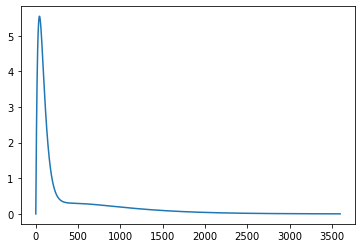

In [6]:
C_tau_y = 0.043 #s
C_tau_z = 0.45 #s
gamma = 0.64
I =np.zeros(100000)
Ttemp = np.arange(0,int(C_tau_y/dt*15))*dt
C_Ky = Ttemp/C_tau_y /C_tau_y *np.exp(-Ttemp/C_tau_y)
Ttemp = np.arange(0,int(min(C_tau_z/dt*8,len(I)/2)))*dt
C_Kz = gamma*Ttemp/C_tau_y /C_tau_y *np.exp(-Ttemp/C_tau_y)+(1-gamma)*Ttemp/C_tau_z /C_tau_z *np.exp(-Ttemp/C_tau_z)
plt.plot(C_Kz)

In [3]:
def K(x,s):
    return(np.exp(-(x/s)**2))/s/np.sqrt(np.pi)

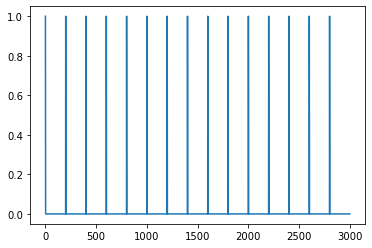

In [4]:
nstep = 3000
frequency = 5#Hz
C = 1
nperiod = int((1/frequency)/dt)
# generation of stimulations
s = np.zeros(nstep)
for i in range(nstep):
    if i % nperiod ==0:
        s[i] = C
#s = np.convolve(tp,s,'same')*dt
plt.plot(s)

In [5]:
alpha = 40
beta = 2
k = 400
g = 40
rsp = np.zeros(nstep)#y output
zts = np.zeros(nstep)#horizontal
ganglions = np.zeros(nstep)#ganglion cell
gains = np.zeros(nstep)
y = 0
z = 0
for i in range(nstep):
    dyj =(-alpha*y+k*(s[i]-z))*dt
    y = y+dyj
    dzj =(-beta*z+g*y)*dt
    z = z+dzj
    rsp[i] = y
    zts[i] = z
    if i >=len(temp_Kz):
        Z = np.convolve(rsp[i-len(temp_Kz)+1:i+1],temp_Kz,'valid')*dt
        if beta_c*Z>0:
            gain_z = 1
        else:
            gain_z = 1+beta_c*Z
        rsp[i] = gain_z*rsp[i]
        gains[i] = gain_z
        
    

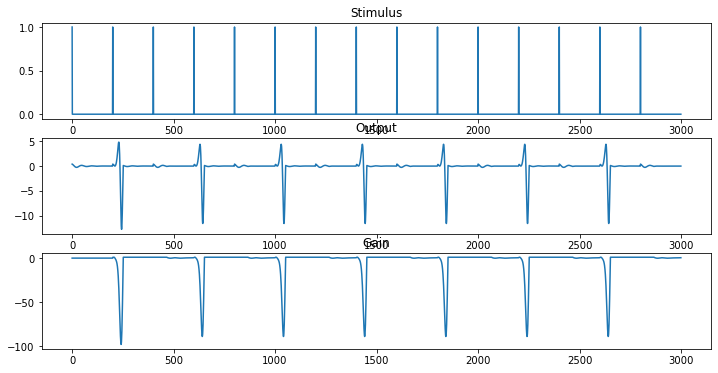

In [6]:
plt.subplot(311)
plt.plot(s)
plt.title('Stimulus')
plt.subplot(312)
plt.plot(rsp)
plt.title('Output')
plt.subplot(313)
plt.plot(gains)
plt.title('Gain')
plt.gcf().set_size_inches(12,6)